In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install scikit-learn
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.1 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'Price')

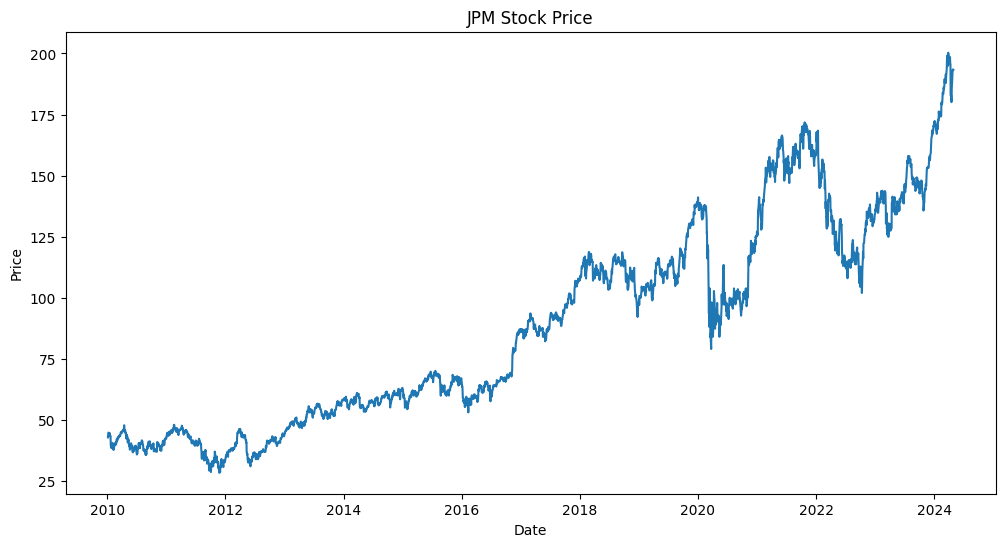

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Download JPM stock price data
jpm = yf.download('jpm', start='2010-01-01', end='2024-04-30')

# Plot JPM stock price
plt.figure(figsize=(12, 6))
plt.plot(jpm['Close'])
plt.title('JPM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [3]:
# Split data into training and testing sets
train_size = int(len(jpm) * 0.7)
train_data = jpm['Close'][:train_size]
test_data = jpm['Close'][train_size:]

In [4]:
#Normalize the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.values.reshape(-1, 1))

In [6]:
# Create a GP model
kernel = RBF(length_scale = 1)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(train_data_normalized, train_data_normalized)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [7]:
# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))
predictions = model.predict(test_data_normalized)

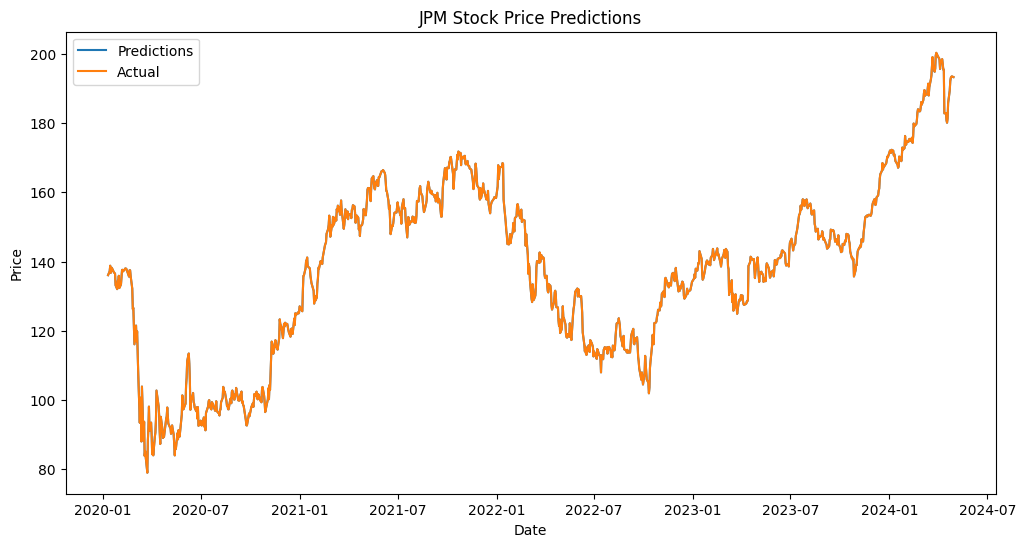

In [8]:
# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

(120.0, 180.0)

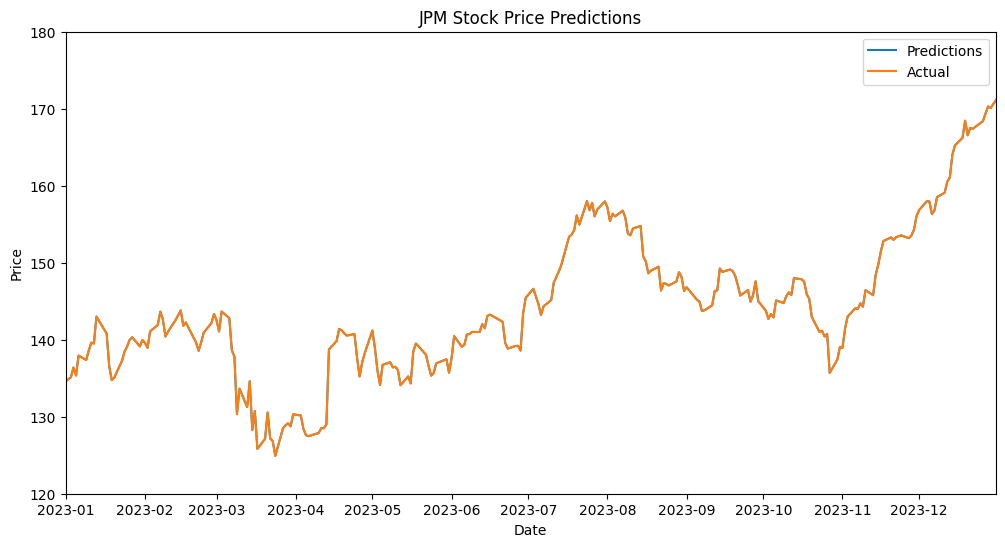

In [9]:
import matplotlib.dates as mdates
import pandas as pd


# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xlim([mdates.date2num(pd.Timestamp('2023-01-01')), mdates.date2num(pd.Timestamp('2023-12-31'))])  # Zoom into 2023
plt.ylim(120, 180)  # Zoom into price range from $100 to $150


In [10]:
# Calculate evaluation metrics
mse = mean_squared_error(test_data, scaler.inverse_transform(predictions.reshape(-1, 1)))
mape = mean_absolute_percentage_error(test_data, scaler.inverse_transform(predictions.reshape(-1, 1)))

In [11]:
mse

4.924388089855529e-05

In [12]:
mape

1.205137332798827e-05

In [13]:
from sklearn.gaussian_process.kernels import Matern

# Create a GP model with the Matern kernel
kernel = Matern(nu=1.5)
model = GaussianProcessRegressor(kernel=kernel)
model.fit(train_data_normalized, train_data_normalized)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5))

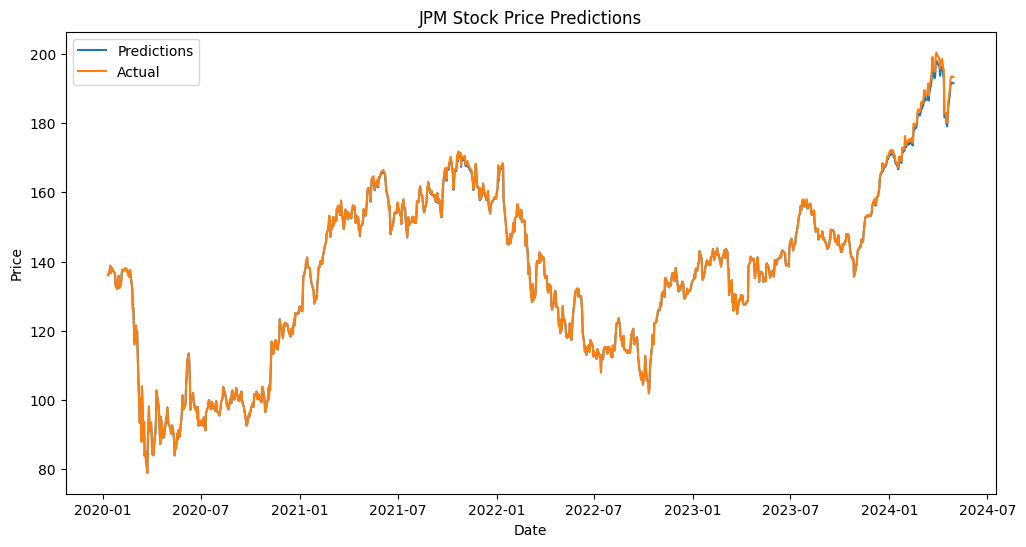

In [14]:
# Make predictions on the testing set
test_data_normalized = scaler.transform(test_data.values.reshape(-1, 1))
predictions = model.predict(test_data_normalized)

# Plot predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, scaler.inverse_transform(predictions.reshape(-1, 1)), label='Predictions')
plt.plot(test_data.index, test_data.values, label='Actual')
plt.title('JPM Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()